## Encoder and Decoder using Autoencoder

![](img/autoencoder_schema.jpg)

In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd

active pyforest.LazyImport of <module 'pandas' from '/Applications/anaconda3/lib/python3.7/site-packages/pandas/__init__.py'>

In [125]:
x = pd.read_csv("/Users/gowtham/Downloads/datasets/fashion-mnist_train.csv" )
y = pd.read_csv("/Users/gowtham/Downloads/datasets/fashion-mnist_test.csv" )

Normalize all values between 0 and 1

In [126]:
y.label.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

In [127]:
x_train = np.array(x.iloc[:,1:])
y_train = np.array(x.iloc[:,0])

x_test = np.array(y.iloc[:,1:])
y_test = np.array(y.iloc[:,0])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [128]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [129]:
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [130]:

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.


Flatten the 28x28 images into vectors of size 784.


#### Fully-connected neural layer as encoder and as decoder:

In [131]:
from keras.layers import Input, Dense
from keras.models import Model

In [132]:
# The size of encoded and actual representations

encoding_dim = 32 

img_dim = x_train.shape[1] #784

In [133]:
img_dim

784

In [134]:
# Input placeholder
input_img = Input(shape=(img_dim,))
hidden1 = Dense(512,activation='relu') (input_img)
hidden2 = Dense(256,activation='relu') (hidden1)
hidden3 = Dense(128,activation='relu') (hidden2)
hidden4 = Dense(64,activation='relu') (hidden3)
encoded = Dense(32,activation='relu') (hidden4)

# "encoded" is the encoded representation of the input

hidden5 = Dense(64,activation='relu') (encoded)
hidden6 = Dense(128,activation='relu') (hidden5)
hidden7 = Dense(256,activation='relu') (hidden6)
hidden8 = Dense(512,activation='relu') (hidden7)
decoded = Dense(img_dim, activation='sigmoid') (hidden8)

# "decoded" is the lossy reconstruction of the input
#decoded = Dense(img_dim, activation='softmax')(encoded)

In [135]:
# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

In [136]:
print(autoencoder.summary())

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_60 (Dense)             (None, 64)                211

### Create a separate encoder model

In [137]:
# this model maps an input to its encoded representation

encoder = Model(input_img, encoded)

In [138]:
print(encoder.summary())

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
Total params: 576,480
Trainable params: 576,480
Non-trainable params: 0
____________________________________________________

### Create a separate decoder model

In [139]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))


# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-5](encoded_input)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [140]:
print(decoder.summary())

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_61 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_62 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_63 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_64 (Dense)             (None, 784)               402192    
Total params: 577,232
Trainable params: 577,232
Non-trainable params: 0
____________________________________________________

Configure the model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

In [141]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train our autoencoder for 50 epochs:

In [142]:
training_history = autoencoder.fit(x_train, x_train, epochs=20,
                                   batch_size=256, shuffle=True,
                                   validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.3778 - accuracy: 0.4895 - val_loss: 0.3184 - val_accuracy: 0.5030
Epoch 2/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.3099 - accuracy: 0.5035 - val_loss: 0.3026 - val_accuracy: 0.5044
Epoch 3/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.3011 - accuracy: 0.5049 - val_loss: 0.2971 - val_accuracy: 0.5058
Epoch 4/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.2962 - accuracy: 0.5056 - val_loss: 0.2950 - val_accuracy: 0.5059
Epoch 5/20
60000/60000 [==============================] - 16s 260us/step - loss: 0.2928 - accuracy: 0.5061 - val_loss: 0.2925 - val_accuracy: 0.5078
Epoch 6/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.2903 - accuracy: 0.5064 - val_loss: 0.2883 - val_accuracy: 0.5071
Epoch 7/20
60000/60000 [==============================] 

### Visualize the training of our Neural Network

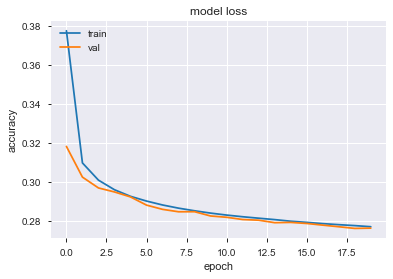

In [143]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

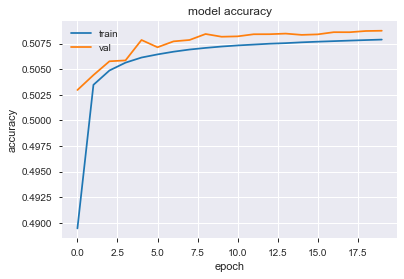

In [144]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Visualize the reconstructed inputs and the encoded representations using Matplotlib.

In [21]:
# Note that we take them from the *test* set

encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

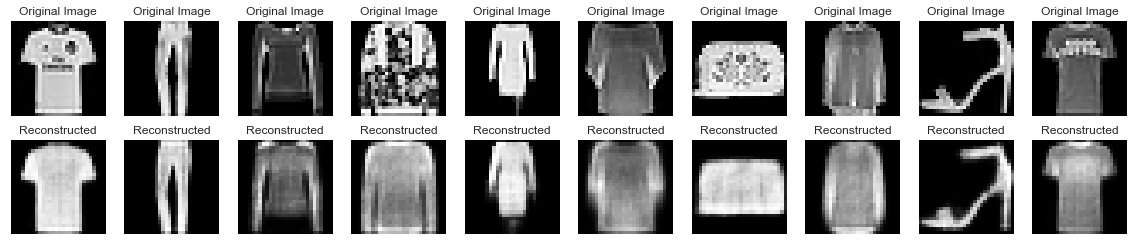

In [22]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')

plt.show()

In [23]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
training_history1 = autoencoder.fit(x_train, x_train, epochs=30,
                                   batch_size=128, shuffle=False,
                                   validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 298us/step - loss: 0.2852 - accuracy: 0.5072 - val_loss: 0.2860 - val_accuracy: 0.5070
Epoch 2/30
60000/60000 [==============================] - 18s 300us/step - loss: 0.2844 - accuracy: 0.5073 - val_loss: 0.2834 - val_accuracy: 0.5091
Epoch 3/30
60000/60000 [==============================] - 18s 300us/step - loss: 0.2838 - accuracy: 0.5074 - val_loss: 0.2825 - val_accuracy: 0.5089
Epoch 4/30
60000/60000 [==============================] - 18s 298us/step - loss: 0.2829 - accuracy: 0.5074 - val_loss: 0.2828 - val_accuracy: 0.5090
Epoch 5/30
60000/60000 [==============================] - 18s 302us/step - loss: 0.2826 - accuracy: 0.5075 - val_loss: 0.2863 - val_accuracy: 0.5089
Epoch 6/30
60000/60000 [==============================] - 18s 299us/step - loss: 0.2820 - accuracy: 0.5075 - val_loss: 0.2784 - val_accuracy: 0.5085
Epoch 7/30
60000/60000 [==============================] 

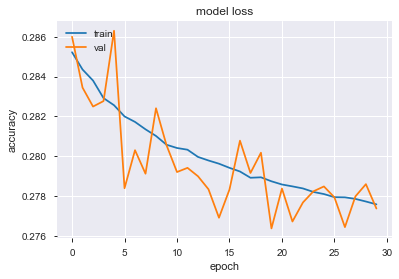

In [28]:
plt.plot(training_history1.history['loss'])
plt.plot(training_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

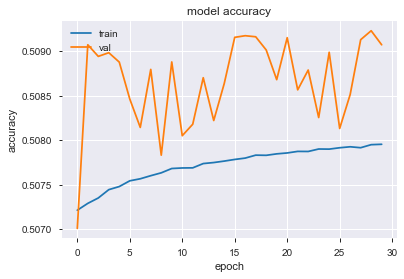

In [29]:
plt.plot(training_history1.history['accuracy'])
plt.plot(training_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
# Note that we take them from the *test* set

encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

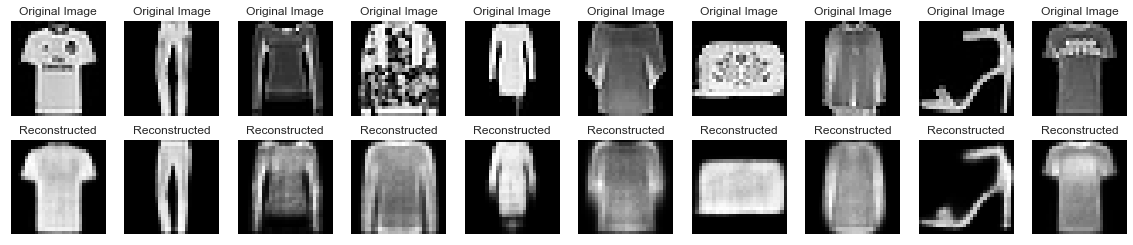

In [31]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')

plt.show()

In [41]:
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
training_history2 = autoencoder.fit(x_train, x_train, epochs=20,
                                   batch_size=256, shuffle=False,
                                   validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.2950 - accuracy: 0.5063 - val_loss: 0.2827 - val_accuracy: 0.5081
Epoch 2/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.2885 - accuracy: 0.5068 - val_loss: 0.2887 - val_accuracy: 0.5079
Epoch 3/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.2863 - accuracy: 0.5071 - val_loss: 0.2835 - val_accuracy: 0.5076
Epoch 4/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.2843 - accuracy: 0.5073 - val_loss: 0.2837 - val_accuracy: 0.5077
Epoch 5/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.2833 - accuracy: 0.5073 - val_loss: 0.2803 - val_accuracy: 0.5084
Epoch 6/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.2822 - accuracy: 0.5075 - val_loss: 0.2834 - val_accuracy: 0.5085
Epoch 7/20
60000/60000 [==============================] 

### T-SNE visualisation of data

In [49]:
#from sklearn.manifold import TSNE

In [50]:
#tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter=300)

In [51]:
#tsne_encoded = tsne.fit_transform(encoded_imgs)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 0.745s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 37.775447
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.207413
[t-SNE] KL divergence after 300 iterations: 2.104160


In [52]:
#tsne_test = tsne.fit_transform(x_test.reshape(x_test.shape[0], -1))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.541s...
[t-SNE] Computed neighbors for 10000 samples in 151.745s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 375.546539
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.873123
[t-SNE] KL divergence after 300 iterations: 2.572357


In [53]:
"""import seaborn as sns
import matplotlib.patheffects as PathEffects

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts"""

(<Figure size 576x576 with 1 Axes>,
 [Text(1.1106064, -6.7828736, '0'),
  Text(-5.0499344, -9.139501, '1'),
  Text(2.325623, -0.10546641, '2'),
  Text(-5.62254, -4.3482757, '3'),
  Text(2.9482565, -2.5255213, '4'),
  Text(3.7862256, 3.951283, '5'),
  Text(-0.5447663, -1.342547, '6'),
  Text(7.487987, 5.2469234, '7'),
  Text(-5.806693, 4.4065056, '8'),
  Text(-0.38208306, 8.79582, '9')])

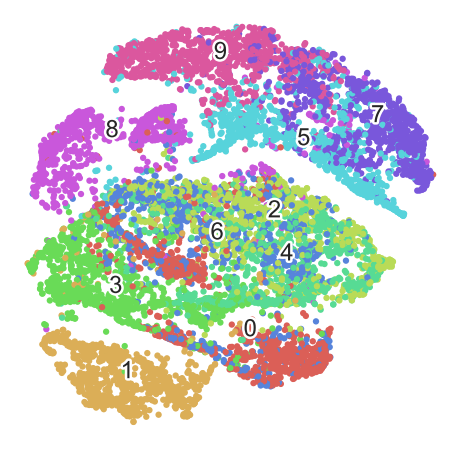

In [54]:
#fashion_scatter(tsne_test, y_test)

(<Figure size 576x576 with 1 Axes>,
 [Text(0.35373455, -0.009915167, '0'),
  Text(-4.307356, -1.2102213, '1'),
  Text(0.42087653, 3.6196928, '2'),
  Text(-2.6178005, -2.150559, '3'),
  Text(2.740874, 4.492366, '4'),
  Text(8.469326, -1.0828906, '5'),
  Text(-0.20938703, 0.7250309, '6'),
  Text(2.4421158, -3.7742562, '7'),
  Text(-2.3339396, 0.8035028, '8'),
  Text(-4.3608146, -0.7724918, '9')])

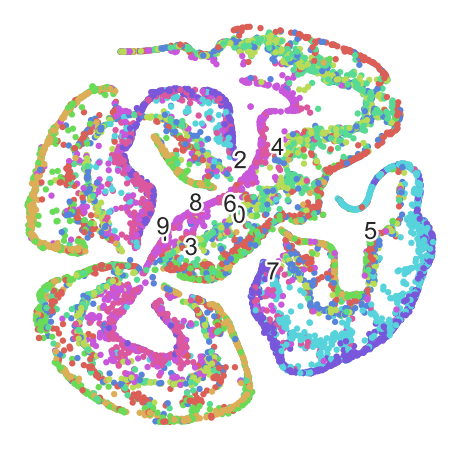

In [55]:
#fashion_scatter(tsne_encoded, y_test)

In [52]:
# Input placeholder
input_img = Input(shape=(img_dim,))
hidden1 = Dense(512,activation='relu') (input_img)
hidden2 = Dense(256,activation='relu') (hidden1)
hidden3 = Dense(128,activation='relu') (hidden2)
hidden4 = Dense(64,activation='relu') (hidden3)
encoded = Dense(32,activation='relu') (hidden4)

# "encoded" is the encoded representation of the input

hidden5 = Dense(64,activation='relu') (encoded)
hidden6 = Dense(128,activation='relu') (hidden5)
hidden7 = Dense(256,activation='relu') (hidden6)
hidden8 = Dense(512,activation='relu') (hidden7)
decoded = Dense(img_dim, activation='tanh') (hidden8)

# "decoded" is the lossy reconstruction of the input
#decoded = Dense(img_dim, activation='softmax')(encoded)

In [53]:
# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

In [54]:
print(autoencoder.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                2112

In [55]:
# this model maps an input to its encoded representation

encoder = Model(input_img, encoded)

In [56]:
print(encoder.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
Total params: 576,480
Trainable params: 576,480
Non-trainable params: 0
_____________________________________________________

In [57]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))


# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-5](encoded_input)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [49]:
print(decoder.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 784)               402192    
Total params: 577,232
Trainable params: 577,232
Non-trainable params: 0
_____________________________________________________

In [65]:
autoencoder.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
training_history_4 = autoencoder.fit(x_train, x_train, epochs=10,
                                   batch_size=512, shuffle=True,
                                   validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.4520 - accuracy: 0.4243 - val_loss: 0.4488 - val_accuracy: 0.4168
Epoch 2/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.4611 - accuracy: 0.4313 - val_loss: 0.4539 - val_accuracy: 0.4197
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.4561 - accuracy: 0.4188 - val_loss: 0.4515 - val_accuracy: 0.4132
Epoch 4/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.4518 - accuracy: 0.4135 - val_loss: 0.4497 - val_accuracy: 0.4109
Epoch 5/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.4595 - accuracy: 0.4204 - val_loss: 0.4513 - val_accuracy: 0.4134
Epoch 6/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.4513 - accuracy: 0.4146 - val_loss: 0.4489 - val_accuracy: 0.4127
Epoch 7/10
60000/60000 [==============================] 

In [67]:
def loss_viz(train_history):
  
  '''
  loss_viz plots the train and validation loss per epoch of a keras history object
  
  Params :
  -------------
  triain_history (keras.cllbacks.History) : The history object returned from calling the .fit() method on a keras neural network. 
  Validation data must be passed into the fit method,else the function might raise error
  
  '''
  

  plt.plot(train_history.history['loss'])
  plt.plot(train_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

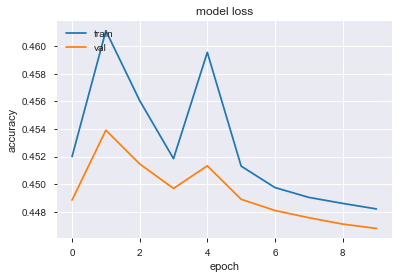

In [68]:
loss_viz(training_history_4)

In [69]:
def Accuracy_viz(train_history):
  plt.plot(train_history.history['accuracy'])
  plt.plot(train_history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

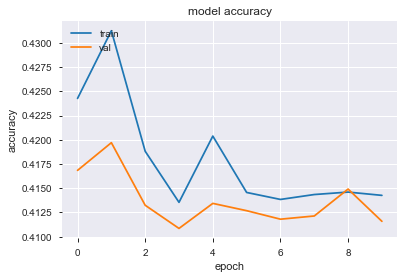

In [70]:
Accuracy_viz(training_history_4)

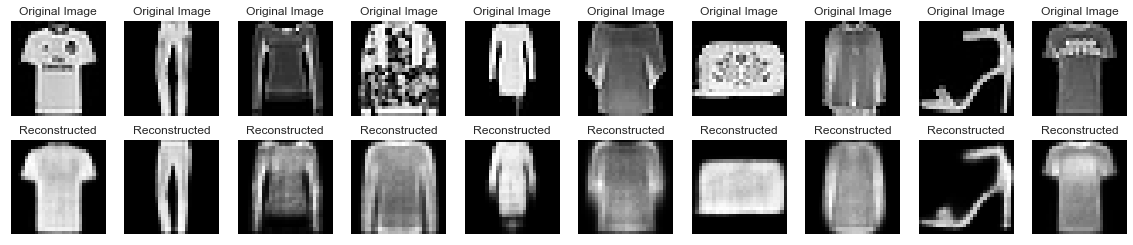

In [71]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')

plt.show()

In [72]:
from keras.layers import BatchNormalization

In [73]:
# Input placeholder
input_img = Input(shape=(img_dim,))

hidden1 = Dense(512,activation='relu') (input_img)
hidden1 = BatchNormalization()(hidden1)
hidden2 = Dense(64,activation='relu') (hidden1)
hidden2 =  BatchNormalization()(hidden2)
encoded = Dense(32,activation='relu') (hidden2)

# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu')(input_img)
hidden3 = Dense(64,activation='relu') (encoded)
hidden3 = BatchNormalization()(hidden3)
hidden4 = Dense(512,activation='relu') (hidden3)
hidden4 = BatchNormalization()(hidden4)
decoded = Dense(img_dim,activation='sigmoid') (hidden4)
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(img_dim, activation='sigmoid')(encoded)

In [74]:
autoencoder = Model(input_img, decoded)

In [75]:
print(autoencoder.summary())

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                32832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                211

In [76]:
# this model maps an input to its encoded representation

encoder = Model(input_img, encoded)

In [77]:
print(encoder.summary())

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                32832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
Total params: 439,136
Trainable params: 437,984
Non-trainable params: 1,152
________________________________________________

In [78]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-5](encoded_input)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [79]:
print(decoder.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_35 (Dense)             (None, 512)               33280     
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_36 (Dense)             (None, 784)               402192    
Total params: 439,888
Trainable params: 438,736
Non-trainable params: 1,152
________________________________________________

In [80]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
training_history2 = autoencoder.fit(x_train, x_train, epochs=200,
                                   batch_size=256, shuffle=True,
                                   validation_data=(x_test, x_test),callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 26s 425us/step - loss: 0.5645 - accuracy: 0.4141 - val_loss: 0.4743 - val_accuracy: 0.4951
Epoch 2/200
60000/60000 [==============================] - 23s 378us/step - loss: 0.3797 - accuracy: 0.4992 - val_loss: 0.3400 - val_accuracy: 0.5032
Epoch 3/200
60000/60000 [==============================] - 23s 386us/step - loss: 0.3301 - accuracy: 0.5032 - val_loss: 0.3217 - val_accuracy: 0.5039
Epoch 4/200
60000/60000 [==============================] - 23s 381us/step - loss: 0.3198 - accuracy: 0.5039 - val_loss: 0.3145 - val_accuracy: 0.5048
Epoch 5/200
60000/60000 [==============================] - 23s 383us/step - loss: 0.3148 - accuracy: 0.5044 - val_loss: 0.3102 - val_accuracy: 0.5055
Epoch 6/200
60000/60000 [==============================] - 23s 384us/step - loss: 0.3110 - accuracy: 0.5049 - val_loss: 0.3067 - val_accuracy: 0.5059
Epoch 7/200
60000/60000 [=========================

Epoch 55/200
60000/60000 [==============================] - 13s 215us/step - loss: 0.2820 - accuracy: 0.5079 - val_loss: 0.2796 - val_accuracy: 0.5090
Epoch 56/200
60000/60000 [==============================] - 13s 215us/step - loss: 0.2818 - accuracy: 0.5080 - val_loss: 0.2793 - val_accuracy: 0.5091
Epoch 57/200
60000/60000 [==============================] - 13s 215us/step - loss: 0.2816 - accuracy: 0.5080 - val_loss: 0.2788 - val_accuracy: 0.5090
Epoch 58/200
60000/60000 [==============================] - 13s 217us/step - loss: 0.2815 - accuracy: 0.5080 - val_loss: 0.2791 - val_accuracy: 0.5089
Epoch 59/200
60000/60000 [==============================] - 13s 215us/step - loss: 0.2813 - accuracy: 0.5080 - val_loss: 0.2794 - val_accuracy: 0.5089
Epoch 60/200
60000/60000 [==============================] - 13s 217us/step - loss: 0.2813 - accuracy: 0.5080 - val_loss: 0.2789 - val_accuracy: 0.5089
Epoch 61/200
60000/60000 [==============================] - 13s 216us/step - loss: 0.2811 - ac

Epoch 163/200
60000/60000 [==============================] - 13s 220us/step - loss: 0.2737 - accuracy: 0.5085 - val_loss: 0.2720 - val_accuracy: 0.5095
Epoch 164/200
60000/60000 [==============================] - 13s 220us/step - loss: 0.2737 - accuracy: 0.5085 - val_loss: 0.2714 - val_accuracy: 0.5095
Epoch 165/200
60000/60000 [==============================] - 13s 220us/step - loss: 0.2736 - accuracy: 0.5086 - val_loss: 0.2715 - val_accuracy: 0.5094
Epoch 166/200
60000/60000 [==============================] - 13s 220us/step - loss: 0.2735 - accuracy: 0.5086 - val_loss: 0.2715 - val_accuracy: 0.5095
Epoch 167/200
60000/60000 [==============================] - 13s 220us/step - loss: 0.2736 - accuracy: 0.5086 - val_loss: 0.2716 - val_accuracy: 0.5095
Epoch 168/200
60000/60000 [==============================] - 13s 220us/step - loss: 0.2735 - accuracy: 0.5086 - val_loss: 0.2716 - val_accuracy: 0.5095
Epoch 169/200
60000/60000 [==============================] - 13s 219us/step - loss: 0.27

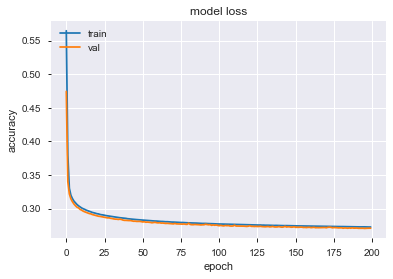

In [83]:
loss_viz (training_history2)

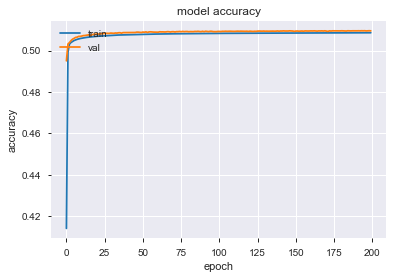

In [84]:
Accuracy_viz(training_history2)

In [85]:
# Note that we take them from the *test* set

encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

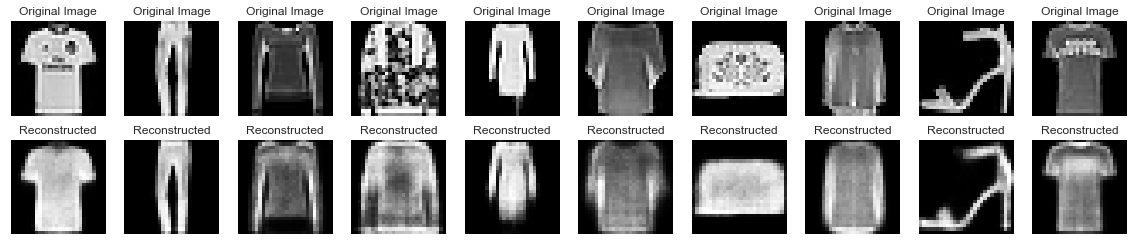

In [86]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')

plt.show()



In [97]:
from keras import optimizers

In [98]:
# Input placeholder
input_img = Input(shape=(img_dim,))

hidden1 = Dense(512,activation='relu') (input_img)

hidden2 = Dense(64,activation='relu') (hidden1)
encoded = Dense(32,activation='relu') (hidden2)

# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu')(input_img)
hidden3 = Dense(64,activation='relu') (encoded)
hidden4 = Dense(512,activation='relu') (hidden3)
decoded = Dense(img_dim,activation='sigmoid') (hidden4)
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(img_dim, activation='sigmoid')(encoded)

In [99]:
# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

In [100]:
print(autoencoder.summary())

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_44 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_47 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_48 (Dense)             (None, 784)               402

In [101]:
# this model maps an input to its encoded representation

encoder = Model(input_img, encoded)

In [102]:
print(encoder.summary())

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_44 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
Total params: 436,832
Trainable params: 436,832
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [104]:
print(decoder.summary())

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_47 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_48 (Dense)             (None, 784)               402192    
Total params: 437,584
Trainable params: 437,584
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
training_history6= autoencoder.fit(x_train, x_train, epochs=30,
                                   batch_size=256, shuffle=True,
                                   validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 206us/step - loss: 0.4896 - accuracy: 0.4566 - val_loss: 0.3872 - val_accuracy: 0.4967
Epoch 2/30
60000/60000 [==============================] - 11s 189us/step - loss: 0.3773 - accuracy: 0.4916 - val_loss: 0.3704 - val_accuracy: 0.4882
Epoch 3/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.3610 - accuracy: 0.4950 - val_loss: 0.3520 - val_accuracy: 0.5019
Epoch 4/30
60000/60000 [==============================] - 11s 186us/step - loss: 0.3464 - accuracy: 0.4984 - val_loss: 0.3361 - val_accuracy: 0.4984
Epoch 5/30
60000/60000 [==============================] - 13s 211us/step - loss: 0.3346 - accuracy: 0.5005 - val_loss: 0.3322 - val_accuracy: 0.4993
Epoch 6/30
60000/60000 [==============================] - 12s 208us/step - loss: 0.3282 - accuracy: 0.5015 - val_loss: 0.3267 - val_accuracy: 0.5053
Epoch 7/30
60000/60000 [==============================] 

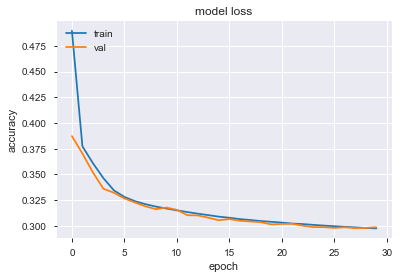

In [108]:
loss_viz (training_history6)

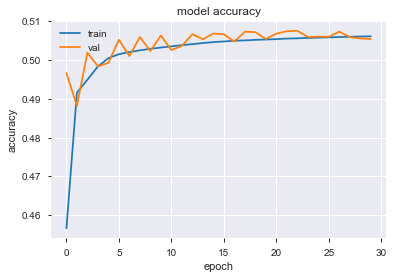

In [109]:
Accuracy_viz(training_history6)

In [110]:
encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

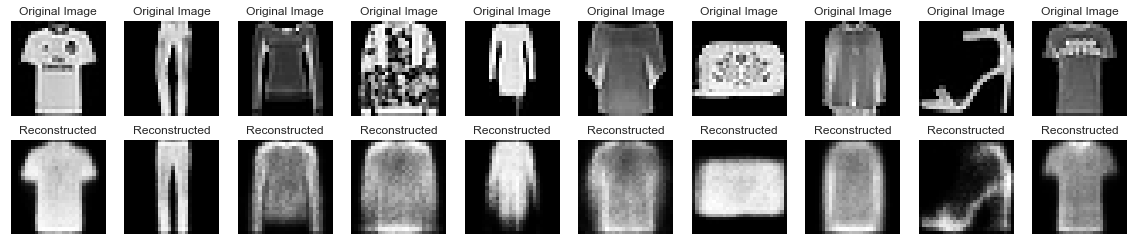

In [111]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')

plt.show()



In [112]:
from keras.layers import Dense, Flatten, Activation, Dropout

In [113]:
# Input placeholder
input_img = Input(shape=(img_dim,))

hidden1 = Dense(512,activation='relu') (input_img)
hidden1 = Dropout(0.25)(hidden1)
hidden2 = Dense(64,activation='relu') (hidden1)
hidden2 =  Dropout(0.5)(hidden2)
encoded = Dense(32,activation='relu') (hidden2)

# "encoded" is the encoded representation of the input
#encoded = Dense(encoding_dim, activation='relu')(input_img)
hidden3 = Dense(64,activation='relu') (encoded)
hidden3 = Dropout(0.5)(hidden3)
hidden4 = Dense(512,activation='relu') (hidden3)
hidden4 = Dropout(0.5)(hidden4)
decoded = Dense(img_dim,activation='sigmoid') (hidden4)
# "decoded" is the lossy reconstruction of the input
#decoded = Dense(img_dim, activation='sigmoid')(encoded)

In [114]:
autoencoder = Model(input_img, decoded)

In [115]:
print(autoencoder.summary())

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_52 (Dense)             (None, 64)                211

In [116]:
# this model maps an input to its encoded representation

encoder = Model(input_img, encoded)

In [117]:
print(encoder.summary())

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 32)                2080      
Total params: 436,832
Trainable params: 436,832
Non-trainable params: 0
____________________________________________________

In [118]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-5](encoded_input)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [119]:
print(decoder.summary())

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 784)               402192    
Total params: 437,584
Trainable params: 437,584
Non-trainable params: 0
____________________________________________________

In [122]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [123]:
training_history7 = autoencoder.fit(x_train, x_train, epochs=30,
                                   batch_size=256, shuffle=True,
                                   validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 13s 220us/step - loss: 0.3763 - accuracy: 0.4927 - val_loss: 0.3477 - val_accuracy: 0.4986
Epoch 2/30
60000/60000 [==============================] - 13s 212us/step - loss: 0.3583 - accuracy: 0.4949 - val_loss: 0.3391 - val_accuracy: 0.5001
Epoch 3/30
60000/60000 [==============================] - 13s 213us/step - loss: 0.3505 - accuracy: 0.4958 - val_loss: 0.3348 - val_accuracy: 0.5003
Epoch 4/30
60000/60000 [==============================] - 13s 215us/step - loss: 0.3468 - accuracy: 0.4967 - val_loss: 0.3332 - val_accuracy: 0.5019
Epoch 5/30
60000/60000 [==============================] - 13s 216us/step - loss: 0.3440 - accuracy: 0.4974 - val_loss: 0.3325 - val_accuracy: 0.5012
Epoch 6/30
60000/60000 [==============================] - 13s 216us/step - loss: 0.3418 - accuracy: 0.4978 - val_loss: 0.3309 - val_accuracy: 0.5017
Epoch 7/30
60000/60000 [==============================] 